Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm # support vector machine classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # StandardScaler used to standardization of the data
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

Data collection and Analysis Of The Diabetes Data

In [ ]:
dataset = pd.read_csv("/content/diabetes.csv")

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.head() # we can print the first 5 rows of the dataframe by using head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0 ---> Non Diabetic

1 ---> Diabetic

In [ ]:
# getting the statistical measures of the data
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X = dataset.drop(columns="Outcome" , axis=1)
Y = dataset["Outcome"]

Finding number of null alues in the dataset

In [ ]:
dataset.isnull().sum()
#below result shows that there is no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [ ]:
diabetes_scaler = StandardScaler()

In [ ]:
diabetes_scaler.fit(X)

StandardScaler()

In [ ]:
diabetes_standardized_data = diabetes_scaler.transform(X)

In [ ]:
print(diabetes_standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = diabetes_standardized_data
Y = dataset["Outcome"]

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the data into Train and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y ,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model with training data

In [ ]:
diabetes_classifier = svm.SVC(kernel = "linear", C = 5)

In [ ]:
# training the support vector machine classifier
diabetes_classifier.fit(X_train , Y_train)

SVC(C=5, kernel='linear')

Model Evaluation

Accuracy Score

 accuracy score on the training data

In [ ]:
X_train_prediction = diabetes_classifier.predict(X_train)
trainiing_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(" Accuracy score of the tarining data :" , trainiing_data_accuracy)

 Accuracy score of the tarining data : 0.7850162866449512


 Accuracy score on the test data

In [ ]:
X_test_prediction = diabetes_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(" Accuracy score of the test data :" , test_data_accuracy)

 Accuracy score of the test data : 0.7727272727272727


Confusion matrix

In [ ]:
diabetes_confusion_matrix = confusion_matrix(Y_test, X_test_prediction)
print(diabetes_confusion_matrix)

[[91  9]
 [26 28]]


In [ ]:
tn,fp,fn,tp = diabetes_confusion_matrix.ravel()
print(tn,fp,fn,tp)

91 9 26 28


<Axes: >

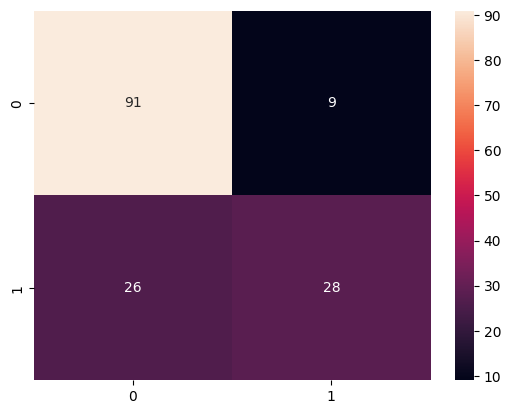

In [ ]:
sns.heatmap(diabetes_confusion_matrix, annot = True)

Precision

In [ ]:
#precision for the training data
diabetes_precision_train = precision_score(Y_train,X_train_prediction)
print("Training data precision = ", diabetes_precision_train)
# precision for the test data
diabetes_precision_test = precision_score(Y_test,X_test_prediction)
print("Test data precision = ", diabetes_precision_test)

Training data precision =  0.7411764705882353
Test data precision =  0.7567567567567568


Recall

In [ ]:
# Recall for the training data
diabetes_recall_train = recall_score(Y_train,X_train_prediction)
print("Training data recall = ", diabetes_recall_train)
# recall for the test data
diabetes_recall_test = recall_score(Y_test,X_test_prediction)
print("Test data recall = ", diabetes_recall_test)

Training data recall =  0.5887850467289719
Test data recall =  0.5185185185185185


F1 score

In [ ]:
# f1 score for training data
diabetes_f1_score_train = f1_score(Y_train, X_train_prediction)
print(" f1 score on train data : " ,diabetes_f1_score_train)

# f1 score for test data
diabetes_f1_score_test = f1_score(Y_test, X_test_prediction)
print(" f1 score on test data : " ,diabetes_f1_score_test)


 f1 score on train data :  0.65625
 f1 score on test data :  0.6153846153846154


Making a Predictive system

In [ ]:
input_data = (1,89,66,23,94,28.1,0.167,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# replace the array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# standardize the input data

std_data = diabetes_scaler.transform(input_data_reshaped)
print(std_data)

prediction = diabetes_classifier.predict(std_data)

print(prediction)

if (prediction[0]==0):
  print("person is not diabetic")

else:
  print("person is diabetic")

[[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
[0]
person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
